# 기계학습

### 담당교수 : 장원중

#### 그래프 한글이 깨질때 & 마이너스 부호 사용

In [1]:
import sys, os
from matplotlib import font_manager, rc 
import matplotlib.pyplot as plt

# 한글 폰트 설정 : 윈도우 폰트를 사용하는 경우 
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name) 

# 운영체제별 한글 폰트 설정
# if os.name == 'posix': # Mac 환경 폰트 설정
#     rc('font', family='AppleGothic')
# elif os.name == 'nt': # Windows 환경 폰트 설정
#     rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

# 유니코드에서 음수 부호설정
rc('axes', unicode_minus=False)

# 부모 디렉터리의 파일을 가져올 수 있도록 설정
sys.path.append(os.pardir)     

# jupyter에서 matplotlib 그래프를 출력 영역에 표시  
%matplotlib inline 

# 레티나 설정 - 폰트 주변이 흐릿하게 보이는 것을 방지해 글씨가 좀 더 선명하게 보임
%config InlineBackend.figure_format = 'retina'

# 이상치 처리

## 데이터 집합 읽어오기

In [2]:
# 라이브러리 읽어오기 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [3]:
# 데이터 읽어오기 
sample_data = pd.read_excel(os.getcwd()+'/std_sample_data_filled.xlsx')

# 데이터의 형상 
# - shape 속성 : 데이터의 (행, 열) 크기를 확인 
print(sample_data.shape)   # (500, 5)

(500, 5)


## 키(cm) 속성으로 상자그림 그리기 

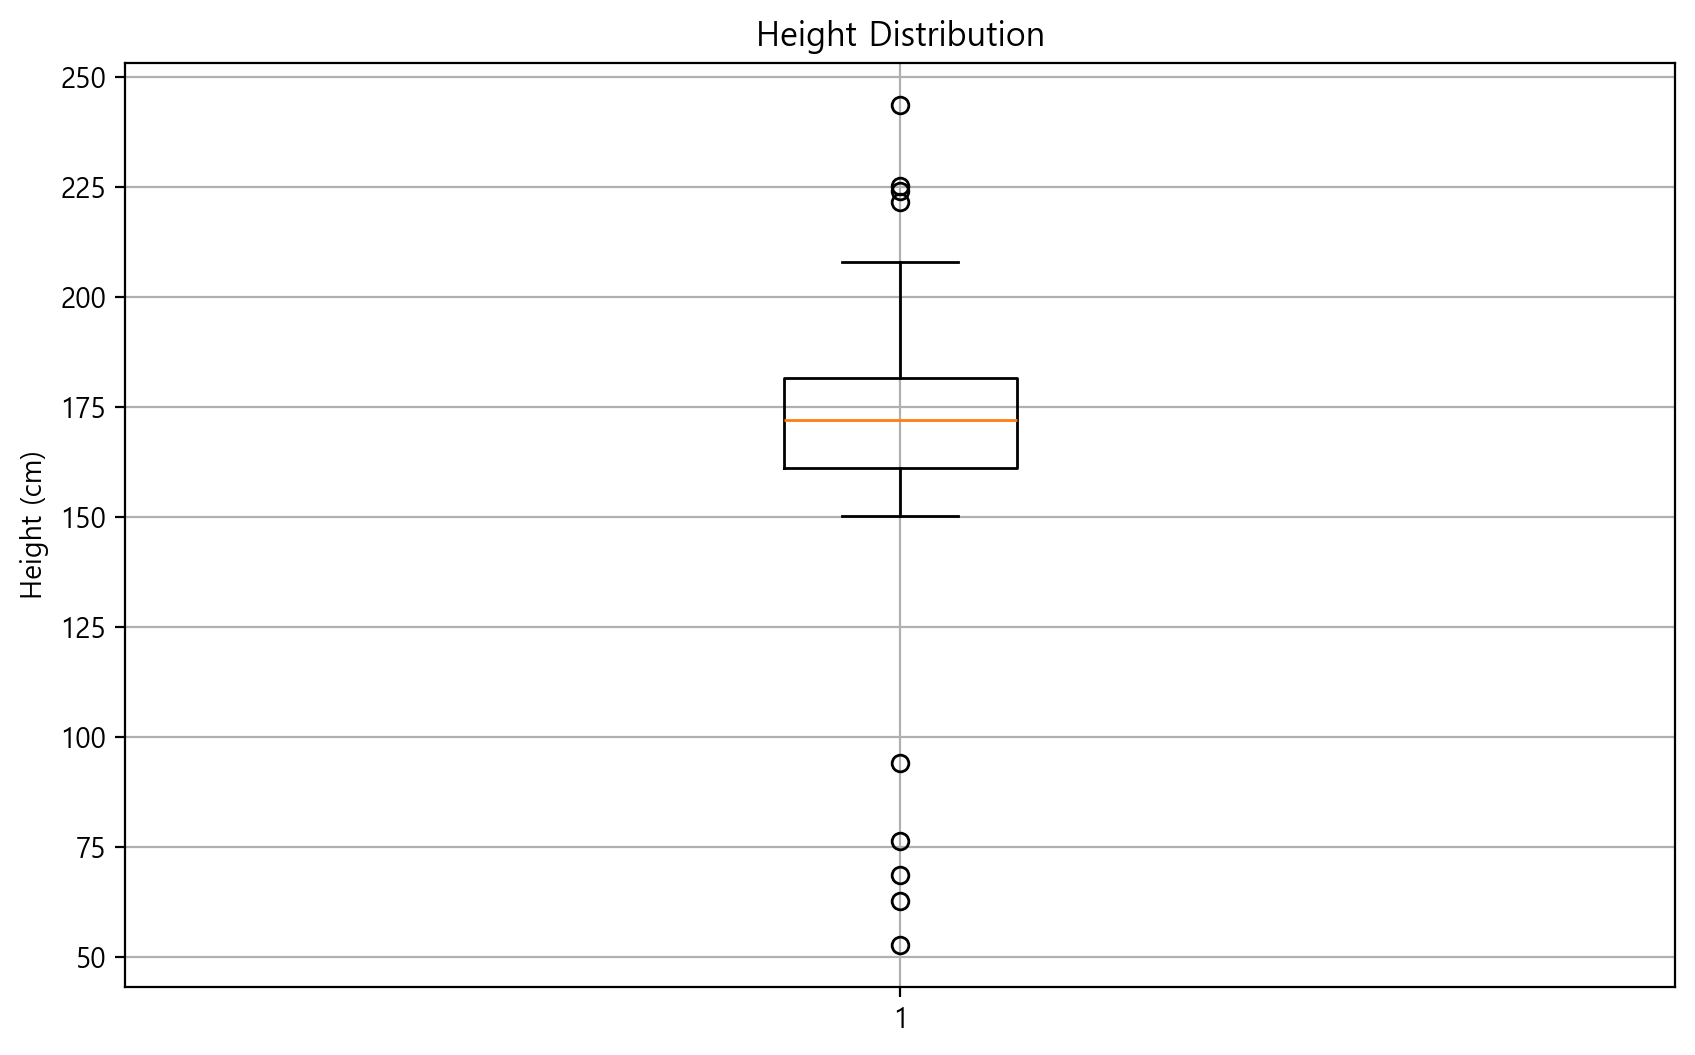

In [4]:
# 상자그림 생성
plt.figure(figsize=(10, 6))
plt.boxplot(sample_data["키(cm)"])
plt.title('Height Distribution')
plt.ylabel('Height (cm)')
plt.grid(True)
plt.show()

## 키(cm) 속성의 이상치 데이터 행 출력하기 

In [6]:
# 이상치 탐지: 상자그림을 이용한 IQR 방법 적용
Q1 = sample_data["키(cm)"].quantile(0.25)
Q3 = sample_data["키(cm)"].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 데이터 필터링
outliers = sample_data[(sample_data["키(cm)"] < lower_bound) | (sample_data["키(cm)"] > upper_bound)]

# 이상치 데이터 출력
print(outliers)

      성명  학년       키(cm)  몸무게(kg)   취미
75   최수현   3   68.521901     60.0   축구
96   박민수   1   94.095151     77.8  테니스
103  최민수   2   62.744453     59.4  달리기
174  정준호   4  243.731618     54.9   골프
199  이하윤   2  225.148292     65.2   축구
319  장지우   3   52.789536     76.4   등산
447  임지훈   3   76.362893     47.5   골프
458  조하윤   4  221.636048     51.3   수영
467  윤지우   1  224.002422     75.0   수영


## 키(cm) 속성의 이상치 데이터를 모두 제거하기 

In [9]:
# 이상치 탐지: 상자그림을 이용한 IQR 방법 적용
Q1 = sample_data["키(cm)"].quantile(0.25)
Q3 = sample_data["키(cm)"].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 제거
df_no_outliers_height = sample_data[(sample_data["키(cm)"] >= lower_bound) & (sample_data["키(cm)"] <= upper_bound)]

# 결과 데이터프레임 출력
print(df_no_outliers_height)

      성명  학년  키(cm)    몸무게(kg)   취미
0    이서연   3  150.8   62.00000   탁구
1    장지민   3  181.1   84.30000   탁구
2    윤하윤   1  161.3   70.60000   골프
3    임수현   1  158.6   79.80000  달리기
4    정수현   3  182.9   80.40000   골프
..   ...  ..    ...        ...  ...
495  장민수   1  184.5   59.20000   등산
496  최하윤   4  179.5   57.00000   축구
497  윤현우   2  188.7   63.80000  테니스
498  임지민   4  158.9  115.36752   탁구
499  김예은   3  179.9   84.60000  달리기

[491 rows x 5 columns]


## 이상치가 제거된 데이터 집합의 키(cm) 속성으로 상자그림 그리기

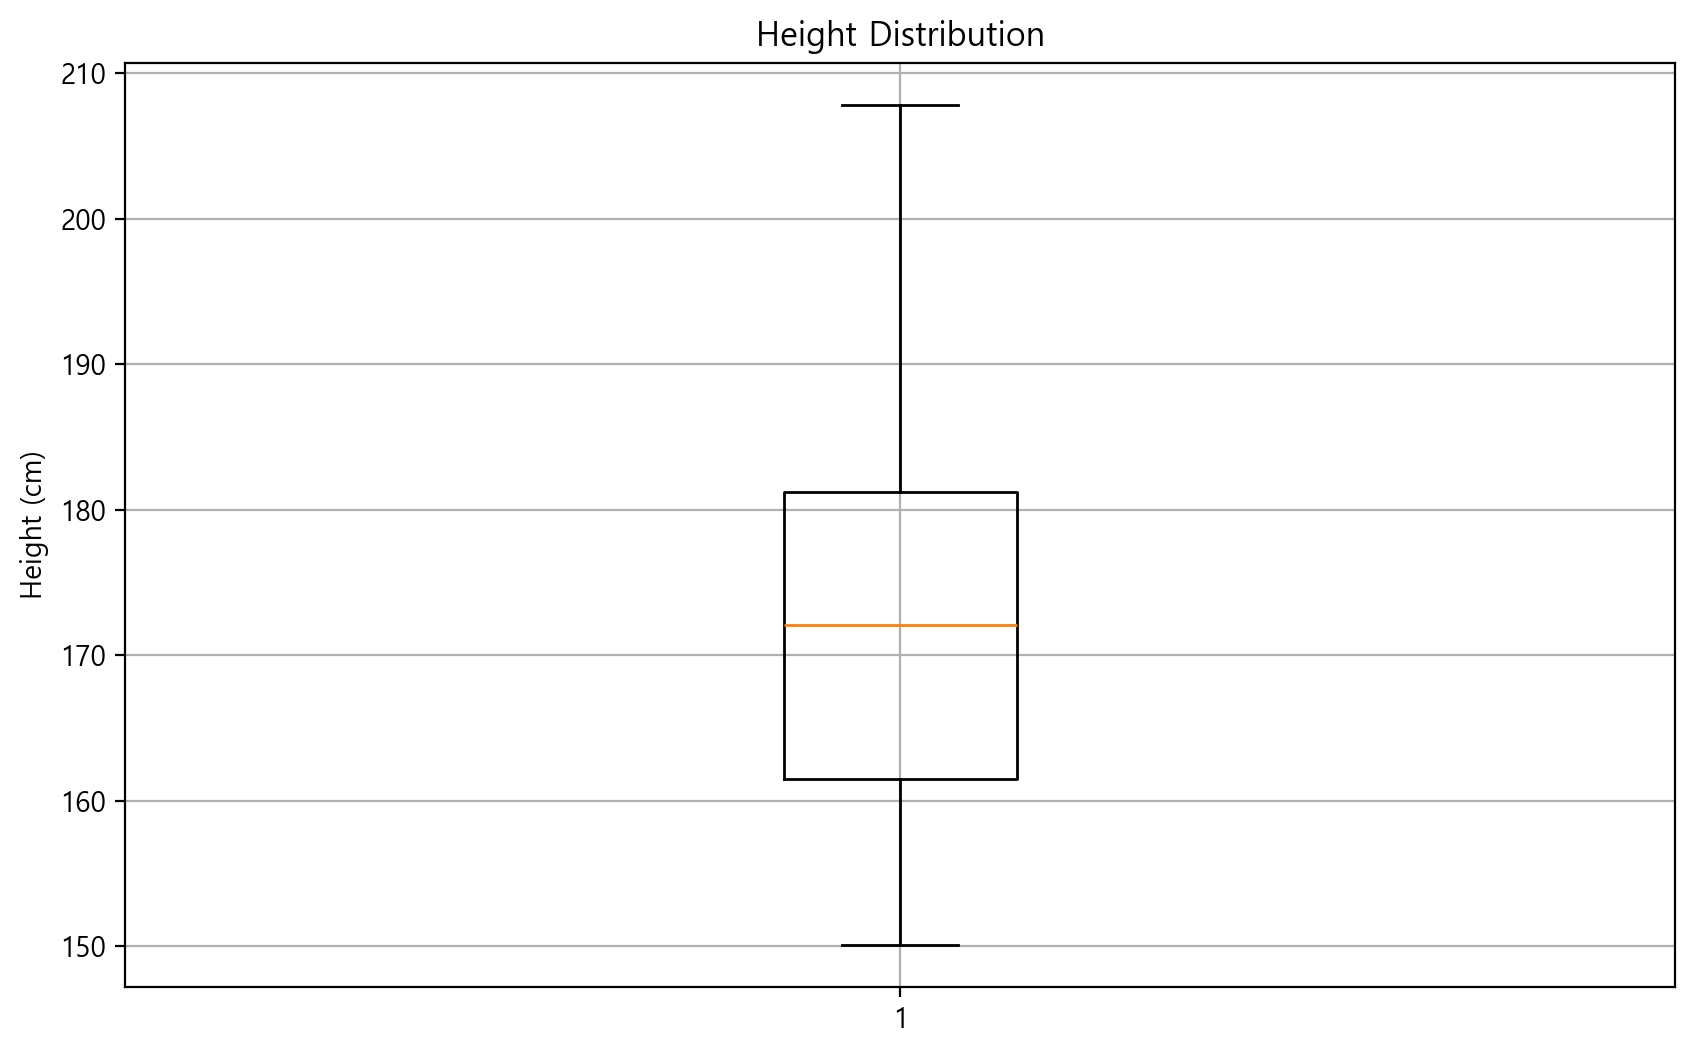

In [10]:
# 상자그림 생성
plt.figure(figsize=(10, 6))
plt.boxplot(df_no_outliers_height["키(cm)"])
plt.title('Height Distribution')
plt.ylabel('Height (cm)')
plt.grid(True)
plt.show()

## 몸무게(kg) 속성으로 상자그림 그리기

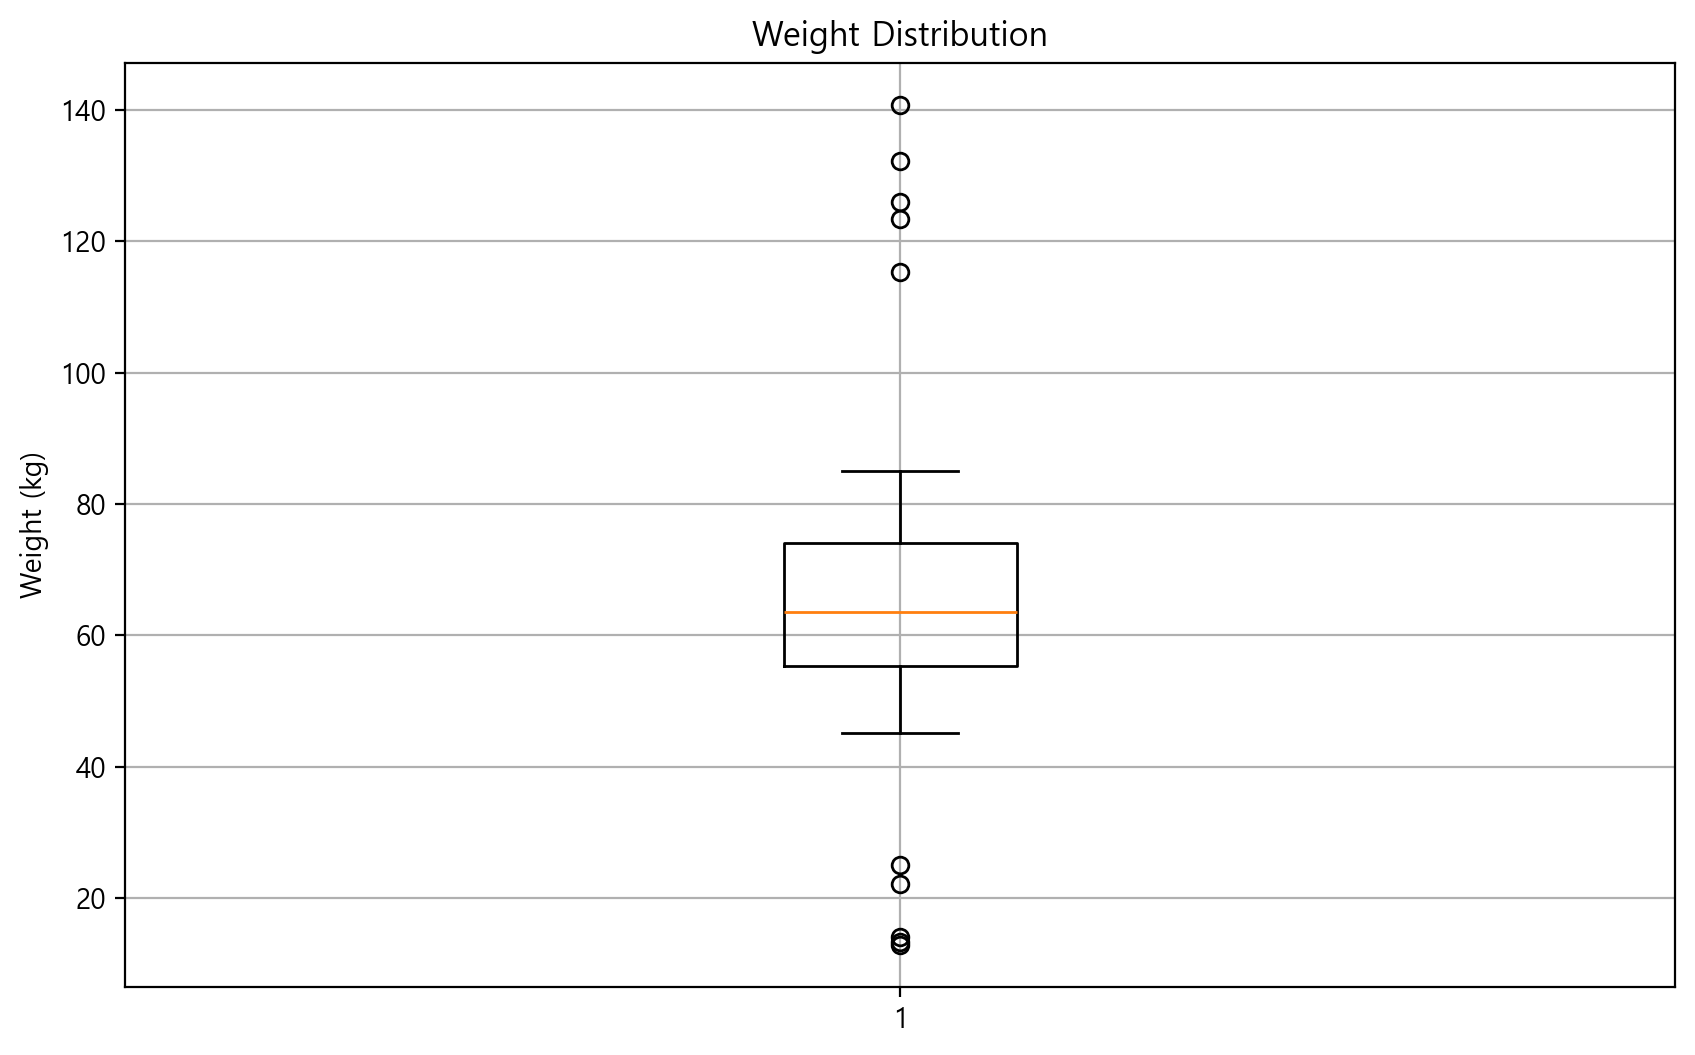

In [7]:
# 상자그림 생성 - 몸무게 속성
plt.figure(figsize=(10, 6))
plt.boxplot(sample_data["몸무게(kg)"])
plt.title('Weight Distribution')
plt.ylabel('Weight (kg)')
plt.grid(True)
plt.show()

## 몸무게(kg) 속성의 이상치 데이터 행 출력하기

In [8]:
# 이상치 탐지: 상자그림을 이용한 IQR 방법 적용
Q1_weight = sample_data["몸무게(kg)"].quantile(0.25)
Q3_weight = sample_data["몸무게(kg)"].quantile(0.75)
IQR_weight = Q3_weight - Q1_weight

# 이상치 경계 설정
lower_bound_weight = Q1_weight - 1.5 * IQR_weight
upper_bound_weight = Q3_weight + 1.5 * IQR_weight

# 이상치 데이터 필터링
outliers_weight = sample_data[(sample_data["몸무게(kg)"] < lower_bound_weight) | (sample_data["몸무게(kg)"] > upper_bound_weight)]

# 이상치 데이터 출력
print(outliers_weight)

      성명  학년  키(cm)     몸무게(kg)   취미
34   윤서연   2  178.6   14.015741  달리기
42   정하윤   3  185.4  123.333757   골프
62   임지훈   1  182.3   12.935121  달리기
74   박예은   1  153.7   25.030951  테니스
131  박수현   1  174.8   22.216642   수영
157  정지우   2  186.1   13.353255   탁구
207  윤현우   1  155.7  140.792628  달리기
400  임현우   4  178.4  125.927393   축구
427  장수현   2  152.9  132.234416   축구
498  임지민   4  158.9  115.367520   탁구


## 몸무게(kg) 속성의 이상치 데이터를 모두 제거하기

In [11]:
# 이상치 탐지: 상자그림을 이용한 IQR 방법 적용
Q1_weight = sample_data["몸무게(kg)"].quantile(0.25)
Q3_weight = sample_data["몸무게(kg)"].quantile(0.75)
IQR_weight = Q3_weight - Q1_weight

# 이상치 경계 설정
lower_bound_weight = Q1_weight - 1.5 * IQR_weight
upper_bound_weight = Q3_weight + 1.5 * IQR_weight

# 이상치 제거
df_no_outliers_weight = sample_data[(sample_data["몸무게(kg)"] >= lower_bound_weight) & (sample_data["몸무게(kg)"] <= upper_bound_weight)]

# 결과 데이터프레임 출력
print(df_no_outliers_weight)

      성명  학년  키(cm)  몸무게(kg)   취미
0    이서연   3  150.8     62.0   탁구
1    장지민   3  181.1     84.3   탁구
2    윤하윤   1  161.3     70.6   골프
3    임수현   1  158.6     79.8  달리기
4    정수현   3  182.9     80.4   골프
..   ...  ..    ...      ...  ...
494  박예은   4  170.3     45.7   축구
495  장민수   1  184.5     59.2   등산
496  최하윤   4  179.5     57.0   축구
497  윤현우   2  188.7     63.8  테니스
499  김예은   3  179.9     84.6  달리기

[490 rows x 5 columns]


## 이상치가 제거된 데이터 집합의 몸무게(kg) 속성으로 상자그림 그리기

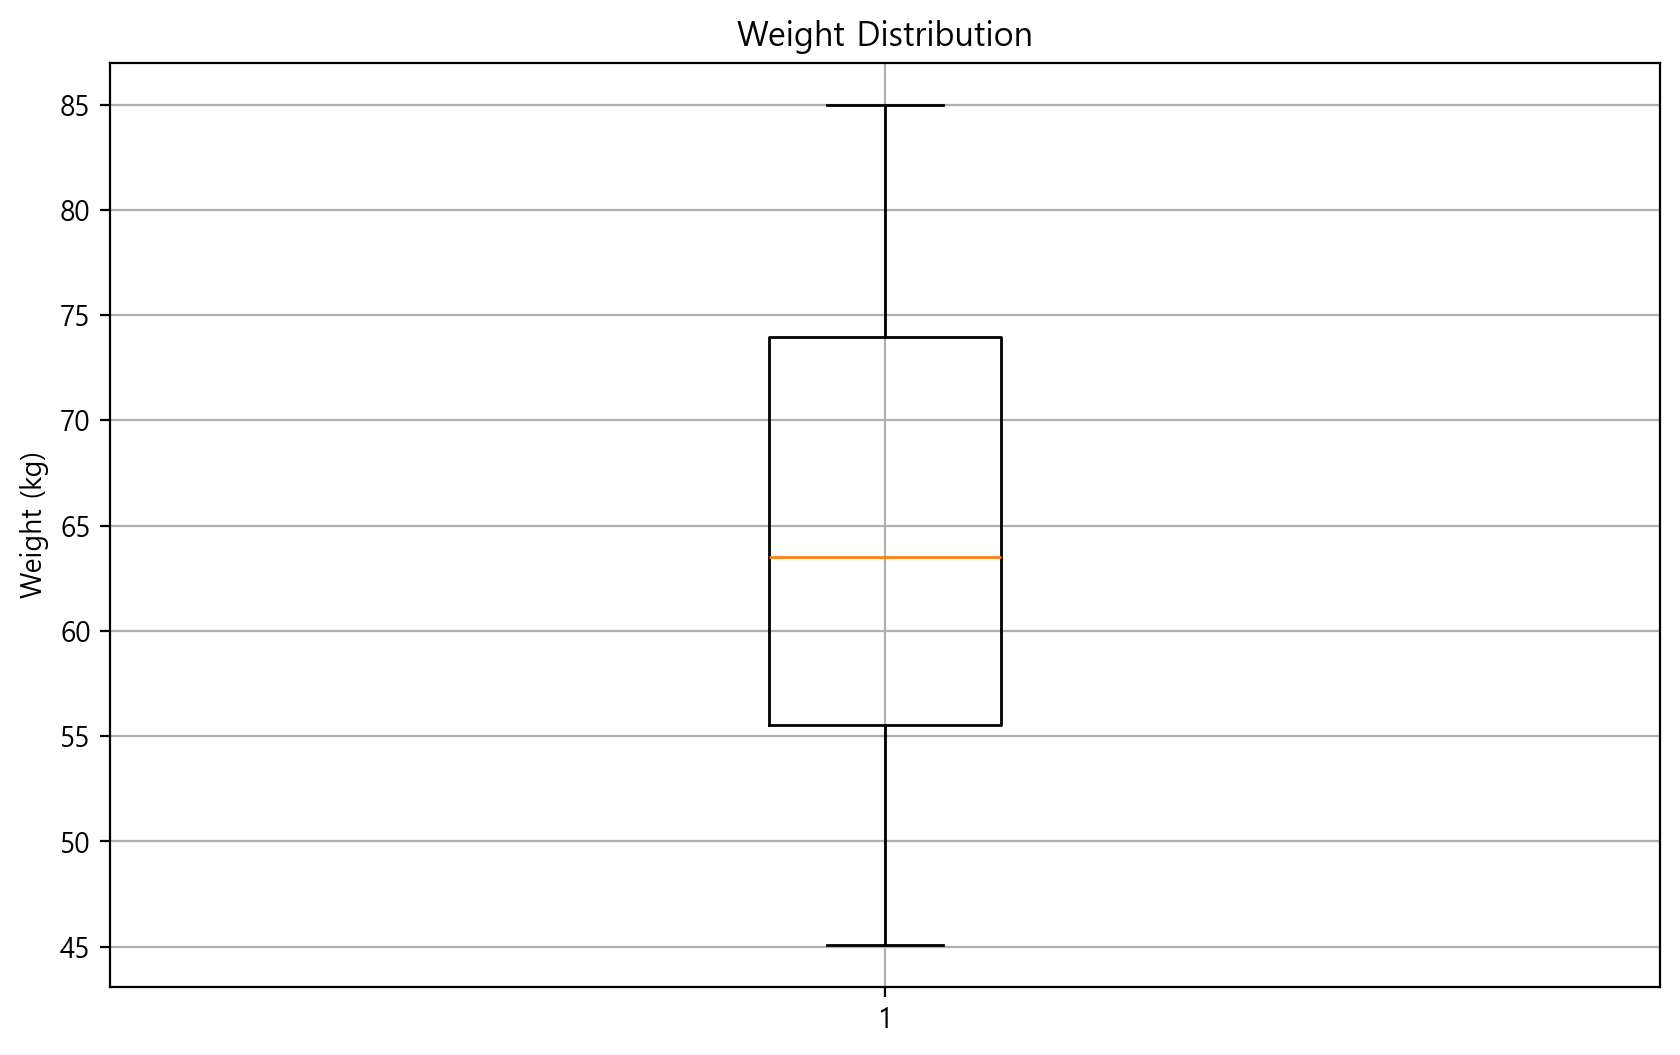

In [12]:
# 상자그림 생성 - 몸무게 속성
plt.figure(figsize=(10, 6))
plt.boxplot(df_no_outliers_weight["몸무게(kg)"])
plt.title('Weight Distribution')
plt.ylabel('Weight (kg)')
plt.grid(True)
plt.show()

## 이상치 데이터 제거 후 저장하기 

In [5]:
# 키(cm) 이상치 제거 
# 이상치 탐지: 상자그림을 이용한 IQR 방법 적용
Q1 = sample_data["키(cm)"].quantile(0.25)
Q3 = sample_data["키(cm)"].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 제거
df_no_outliers_filled = sample_data[(sample_data["키(cm)"] >= lower_bound) & (sample_data["키(cm)"] <= upper_bound)]

# 결과 데이터프레임 출력
print(df_no_outliers_filled)

      성명  학년  키(cm)    몸무게(kg)   취미
0    이서연   3  150.8   62.00000   탁구
1    장지민   3  181.1   84.30000   탁구
2    윤하윤   1  161.3   70.60000   골프
3    임수현   1  158.6   79.80000  달리기
4    정수현   3  182.9   80.40000   골프
..   ...  ..    ...        ...  ...
495  장민수   1  184.5   59.20000   등산
496  최하윤   4  179.5   57.00000   축구
497  윤현우   2  188.7   63.80000  테니스
498  임지민   4  158.9  115.36752   탁구
499  김예은   3  179.9   84.60000  달리기

[491 rows x 5 columns]


In [6]:
# 몸무게(kg) 이상치 제거
# 이상치 탐지: 상자그림을 이용한 IQR 방법 적용
Q1_weight = df_no_outliers_filled["몸무게(kg)"].quantile(0.25)
Q3_weight = df_no_outliers_filled["몸무게(kg)"].quantile(0.75)
IQR_weight = Q3_weight - Q1_weight

# 이상치 경계 설정
lower_bound_weight = Q1_weight - 1.5 * IQR_weight
upper_bound_weight = Q3_weight + 1.5 * IQR_weight

# 이상치 제거
df_no_outliers_filled = df_no_outliers_filled[(df_no_outliers_filled["몸무게(kg)"] >= lower_bound_weight) & (df_no_outliers_filled["몸무게(kg)"] <= upper_bound_weight)]

# 결과 데이터프레임 출력
print(df_no_outliers_filled)

      성명  학년  키(cm)  몸무게(kg)   취미
0    이서연   3  150.8     62.0   탁구
1    장지민   3  181.1     84.3   탁구
2    윤하윤   1  161.3     70.6   골프
3    임수현   1  158.6     79.8  달리기
4    정수현   3  182.9     80.4   골프
..   ...  ..    ...      ...  ...
494  박예은   4  170.3     45.7   축구
495  장민수   1  184.5     59.2   등산
496  최하윤   4  179.5     57.0   축구
497  윤현우   2  188.7     63.8  테니스
499  김예은   3  179.9     84.6  달리기

[481 rows x 5 columns]


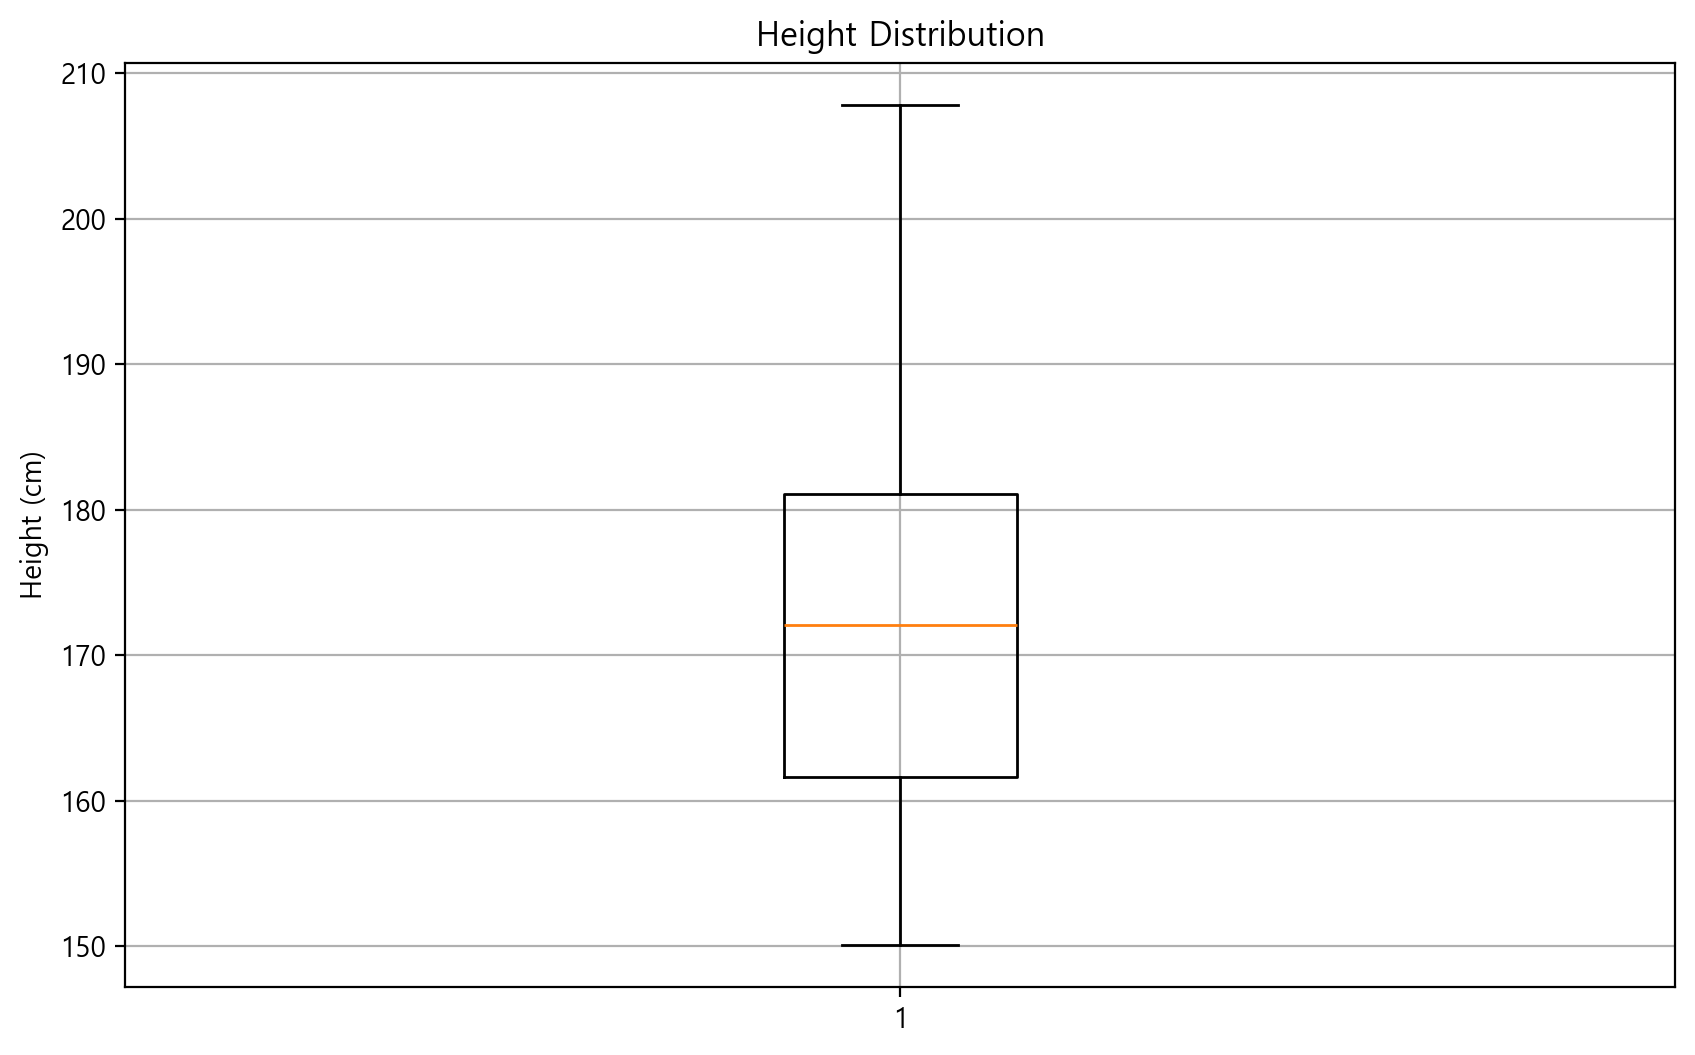

In [7]:
# 상자그림 생성 - 키 속성  
plt.figure(figsize=(10, 6))
plt.boxplot(df_no_outliers_filled["키(cm)"])
plt.title('Height Distribution')
plt.ylabel('Height (cm)')
plt.grid(True)
plt.show()

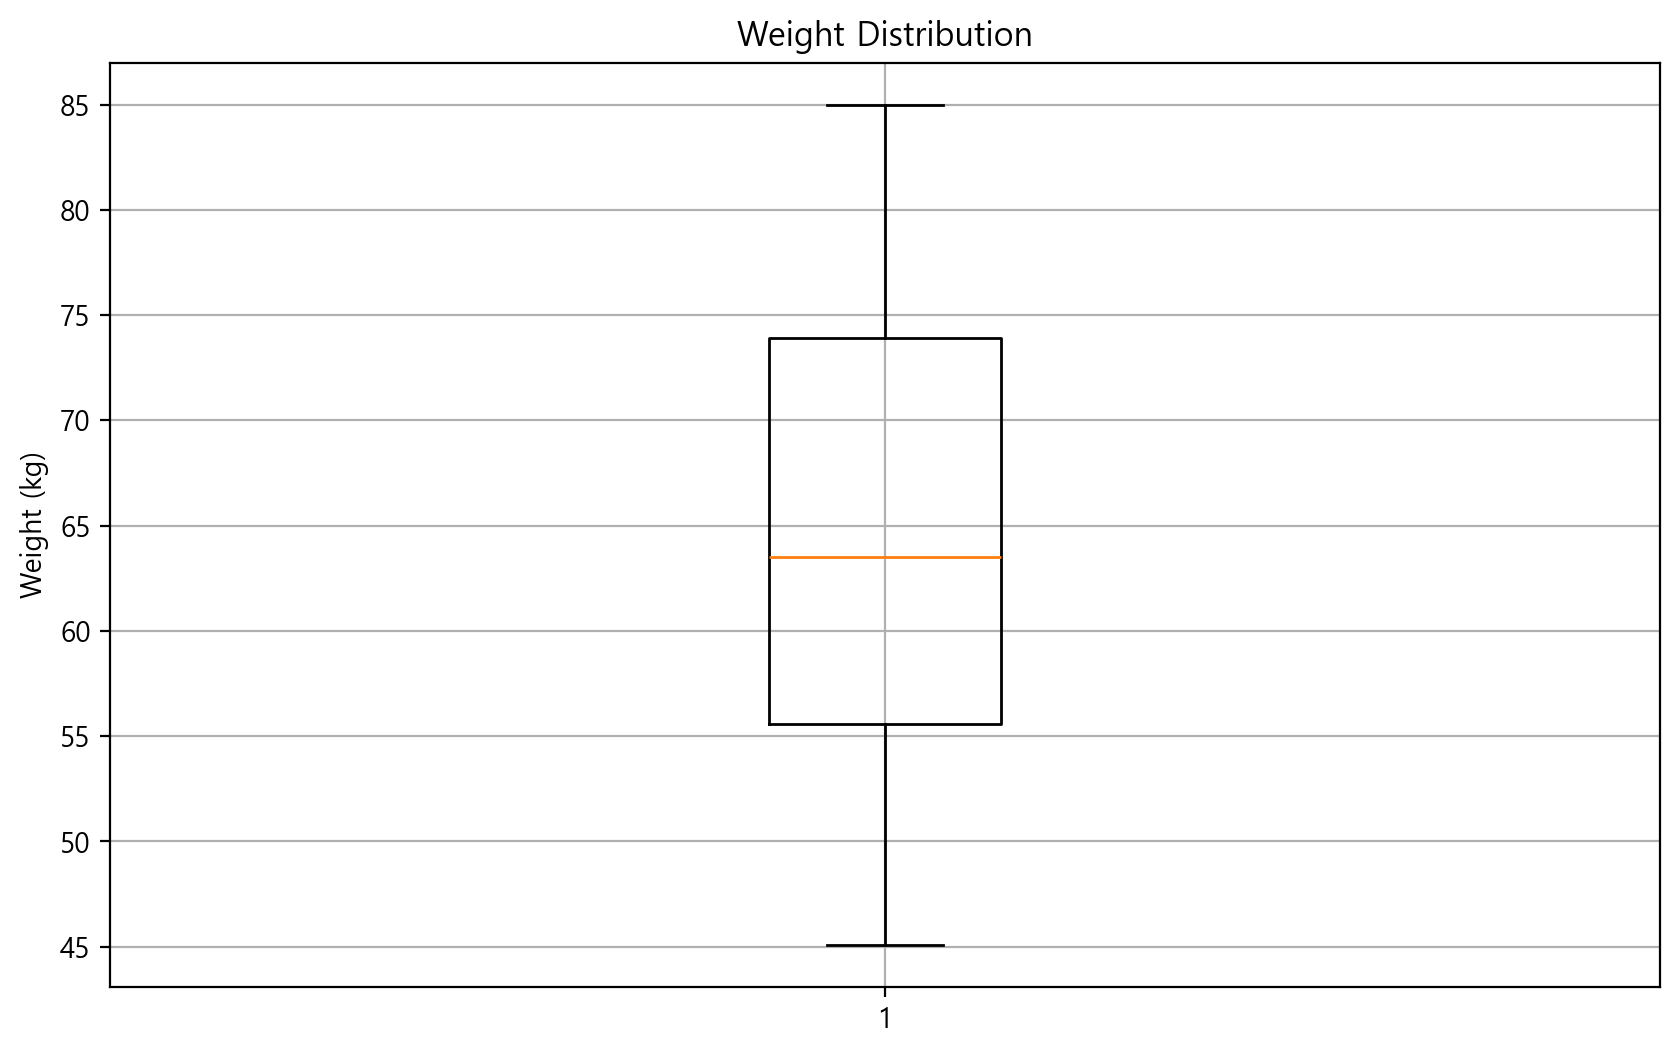

In [8]:
# 상자그림 생성 - 몸무게 속성
plt.figure(figsize=(10, 6))
plt.boxplot(df_no_outliers_filled["몸무게(kg)"])
plt.title('Weight Distribution')
plt.ylabel('Weight (kg)')
plt.grid(True)
plt.show()

In [10]:
# 엑셀 파일로 저장
filled_file_path = os.getcwd()+'/std_sample_data_outliers_filled.xlsx'
df_no_outliers_filled.to_excel(filled_file_path, index=False)

print(f"Filled data saved to {filled_file_path}")

Filled data saved to D:\PyWork\CKU202401SA\ch06/std_sample_data_outliers_filled.xlsx
